In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt

In [3]:
with open('result.json','r') as file:
    json_data = json.load(file)

In [12]:
mapping = {
    'Category' : 'category',
    'Base Inference Time' : 'base_time',
    'Base Inference Memory' : 'base_inference_memory',
    'Base Initial Memory' : 'base_initial_memory',
    'Base End Memory' : 'base_end_memory',
    'LoRA Inference Time' : 'lora_time',
    'LoRA Inference Memory' : 'lora_inference_memory',
    'LoRA Initial Memory' : 'lora_initial_memory',
    'LoRA End Memory' : 'lora_end_memory',
    'LoRA Train Time' : 'lora_train_time',
    'LoRA Train Memory' : 'lora_train_memory',
    'LoRA Initial Train Memory' : 'lora_initial_train_memory',
    'LoRA End Train Memory' : 'lora_end_train_memory'
}
columns = []
for ele in mapping:
    columns.append(ele)
columns.sort()
df = pd.DataFrame(columns=columns)

In [13]:
for i in range(1,len(json_data)):
    row_data = json_data[i]
    new_row = {}
    for ele in mapping:
        new_row[ele] = row_data[mapping[ele]]
    df.loc[len(df)] = new_row

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 250 entries, 0 to 249
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Base End Memory            250 non-null    float64
 1   Base Inference Memory      250 non-null    float64
 2   Base Inference Time        250 non-null    float64
 3   Base Initial Memory        250 non-null    float64
 4   Category                   250 non-null    object 
 5   LoRA End Memory            250 non-null    float64
 6   LoRA End Train Memory      250 non-null    float64
 7   LoRA Inference Memory      250 non-null    float64
 8   LoRA Inference Time        250 non-null    float64
 9   LoRA Initial Memory        250 non-null    float64
 10  LoRA Initial Train Memory  250 non-null    float64
 11  LoRA Train Memory          250 non-null    float64
 12  LoRA Train Time            250 non-null    float64
dtypes: float64(12), object(1)
memory usage: 27.3+ KB


In [15]:
df.head()

,Base End Memory,Base Inference Memory,Base Inference Time,Base Initial Memory,Category,LoRA End Memory,LoRA End Train Memory,LoRA Inference Memory,LoRA Inference Time,LoRA Initial Memory,LoRA Initial Train Memory,LoRA Train Memory,LoRA Train Time
0,2346.940430,371.666016,1.152234,1975.274414,moral_scenarios,3270.165527,4679.818848,259.784668,1.796890,3010.380859,1983.408203,2696.410645,8.237701
1,3249.368652,257.690918,1.649713,2991.677734,moral_scenarios,3268.071777,6114.786133,257.690918,1.723134,3010.380859,2991.677734,3123.108398,17.039225
2,3238.899902,247.222168,1.518526,2991.677734,moral_scenarios,3257.603027,6139.043945,247.222168,1.666947,3010.380859,2991.677734,3147.366211,16.347947
3,3251.110840,259.433105,1.530543,2991.677734,moral_scenarios,3269.118652,6114.786133,258.737793,1.553346,3010.380859,2991.677734,3123.108398,16.935936
4,3248.970215,257.292480,1.436062,2991.677734,moral_scenarios,3267.024902,6089.028320,256.644043,1.469631,3010.380859,2991.677734,3097.350586,15.923892


In [16]:
run_time_col = ['Base Inference Time','LoRA Inference Time','Thời gian chạy (s)']
print(df[run_time_col[0]].mean())
print(df[run_time_col[1]].mean())
print(df[run_time_col[1]].mean()/df[run_time_col[0]].mean())

1.8740636768341064
1.868869605064392
0.9972284443512139


In [27]:
def my_plot(x1_name : str,x2_name : str,y_name : str):
    y1 = df[x1_name]
    x1 = range(1,251)
    y2 = df[x2_name]
    x2 = range(1,251)
    plt.figure(figsize=(10,5))
    plt.plot(x1,y1,label='QBase')
    plt.plot(x2,y2,label='QLoRA')
    plt.xlabel('Thứ tự')
    plt.ylabel(y_name)
    plt.xlim(0,250)
    plt.legend()
    plt.show()
def my_plot_sing(x1_name : str,y_name : str):
    y1 = df[x1_name]
    x1 = range(1,251)
    plt.figure(figsize=(10,5))
    plt.plot(x1,y1,label='QLoRA',color='darkorange')
    plt.xlabel('Thứ tự')
    plt.ylabel(y_name)
    plt.xlim(0,250)
    plt.legend()
    plt.show()
def plot_percent(x1_name : str,x2_name : str,line_name : str):
    y1 = df[x1_name]
    y2 = df[x2_name]
    x3 = range(1,251)
    y3 = []
    for i in range(len(y1)):
        y3.append(y2[i]/y1[i])
    plt.plot(x3,y3,label=line_name)

In [22]:
plot_cols = [
    ['Base Inference Time','LoRA Inference Time','Thời gian chạy (s)'],
    ['Base Inference Memory','LoRA Inference Memory','Bộ nhớ GPU sử dụng (MB) để inference'],
    ['Base Initial Memory','LoRA Initial Memory','Bộ nhớ GPU sử dụng (MB) để lưu mô hình'],
    ['Base End Memory','LoRA End Memory','Bộ nhớ GPU sử dụng (MB) sau khi inference']
]

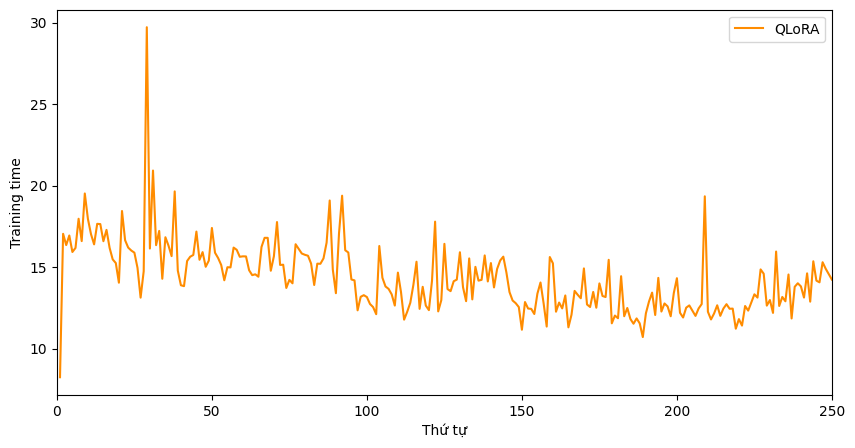

14.329345592498779


In [28]:
my_plot_sing('LoRA Train Time','Training time')
print(df['LoRA Train Time'].mean())

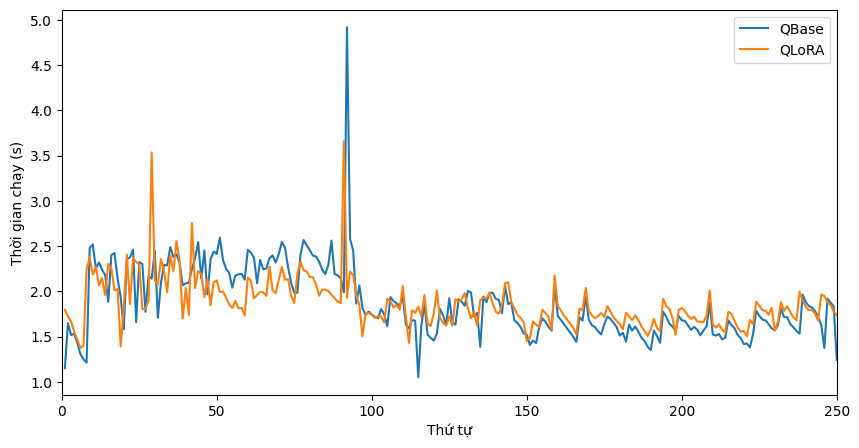

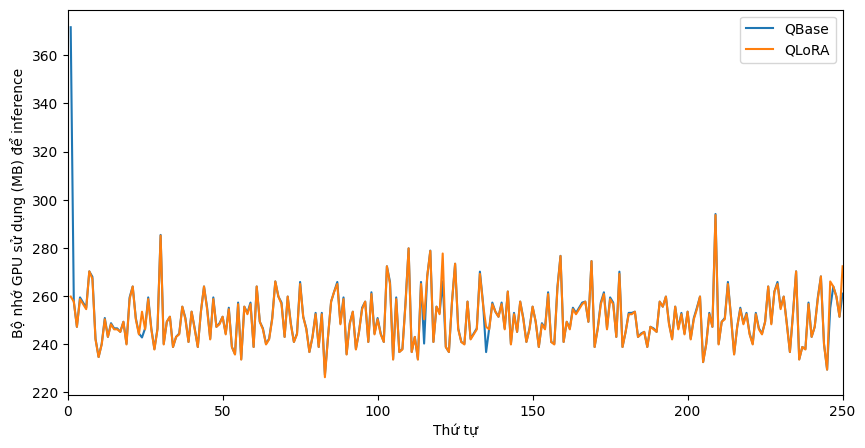

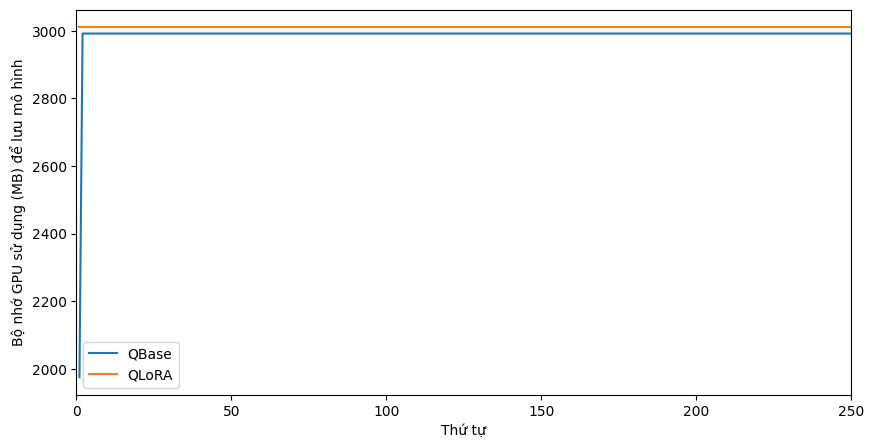

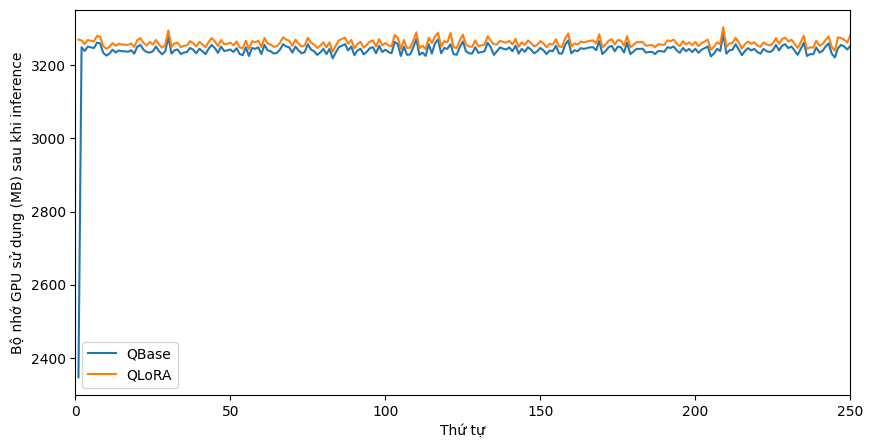

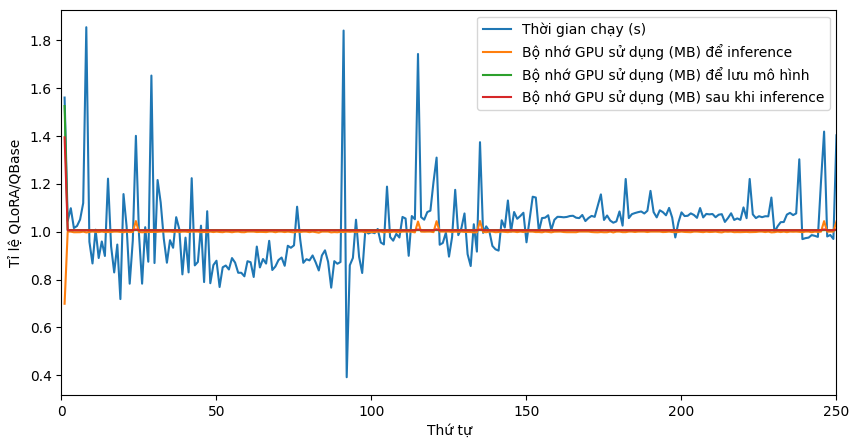

In [11]:
for pair_col in plot_cols:
    my_plot(pair_col[0],pair_col[1],pair_col[2])
plt.figure(figsize=(10,5))
for pair_col in plot_cols:
    plot_percent(pair_col[0],pair_col[1],pair_col[2])

plt.ylabel('Tỉ lệ QLoRA/QBase')
plt.xlabel('Thứ tự')
plt.xlim(0,250)
plt.legend()
plt.show()